In [2]:
%matplotlib notebook

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pyDOE import lhs
from pygmo import fast_non_dominated_sorting as nds
import pandas as pd
import seaborn as sns

In [3]:
known = lhs(2,30) + 1
known = pd.DataFrame(known, columns=["f1","f2"])
known["Type"] = "Dominated"
known["Source"] = "Known Set"
known["Type"][nds(known[["f1","f2"]].values)[0][0]] = "Non-dominated"

/home/rishi/.virtualenvs/O-NAUTILUS/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [4]:
nds(known[["f1","f2"]].values)[0][0]

array([ 1,  7,  9, 14, 19, 20, 22], dtype=uint64)

In [5]:
optimistic = np.linspace(0, np.pi/2, 30)
optimistic = np.asarray((-np.sin(optimistic), -np.cos(optimistic))).T + 1.5
optimistic = optimistic + (np.random.rand(*optimistic.shape) - 0.5)/10
optimistic = pd.DataFrame(optimistic, columns=["f1","f2"])
optimistic["Type"] = "Dominated"
optimistic["Source"] = "Optimistic Set"
optimistic["Type"][nds(optimistic[["f1","f2"]].values)[0][0]] = "Non-dominated"


/home/rishi/.virtualenvs/O-NAUTILUS/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [21]:
- 1e-10

-1e-10

In [22]:
data = pd.concat([known, optimistic])
ideal = data[data["Type"]=="Non-dominated"][["f1", "f2"]].min().values - 1e-10
ideal = pd.DataFrame([list(ideal) + ["Utopian", "Combined Set"]], columns =data.columns)
nadir = data[data["Type"]=="Non-dominated"][["f1", "f2"]].max().values
nadir = pd.DataFrame([list(nadir) + ["Nadir", "Combined Set"]], columns =data.columns)

data = pd.concat([data, ideal, nadir])

<IPython.core.display.Javascript object>


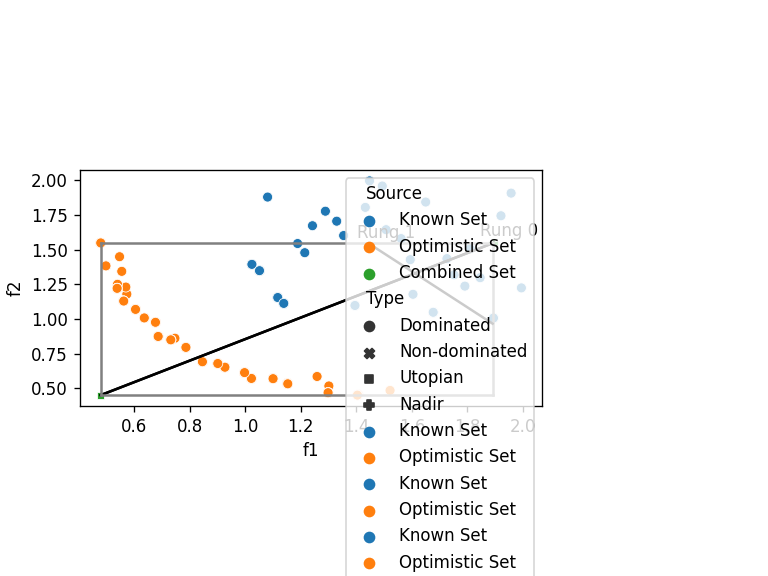

In [51]:
colors = ["#1F5891", "#FFBD52", "#91332D"]

#sns.set_palette(sns.color_palette(colors))
fig = sns.scatterplot(data=data, x="f1", y="f2", hue="Source", style="Type")

plt.gca().set_aspect(0.5008, adjustable='box')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.4)
plt.tight_layout()

plt.savefig("opt_front.pdf", bbox_inches='tight')

In [81]:
print(sns.color_palette())

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (1.0, 0.4980392156862745, 0.054901960784313725), (0.17254901960784313, 0.6274509803921569, 0.17254901960784313), (0.8392156862745098, 0.15294117647058825, 0.1568627450980392), (0.5803921568627451, 0.403921568627451, 0.7411764705882353), (0.5490196078431373, 0.33725490196078434, 0.29411764705882354), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902), (0.4980392156862745, 0.4980392156862745, 0.4980392156862745), (0.7372549019607844, 0.7411764705882353, 0.13333333333333333), (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]


In [75]:
onaut = data[data["Type"]=="Non-dominated"]
known_onaut = onaut[onaut["Source"]=="Known Set"]
opt_onaut = onaut[onaut["Source"]=="Optimistic Set"]

bounds = data[data["Source"] =="Combined Set"].reset_index()

<IPython.core.display.Javascript object>


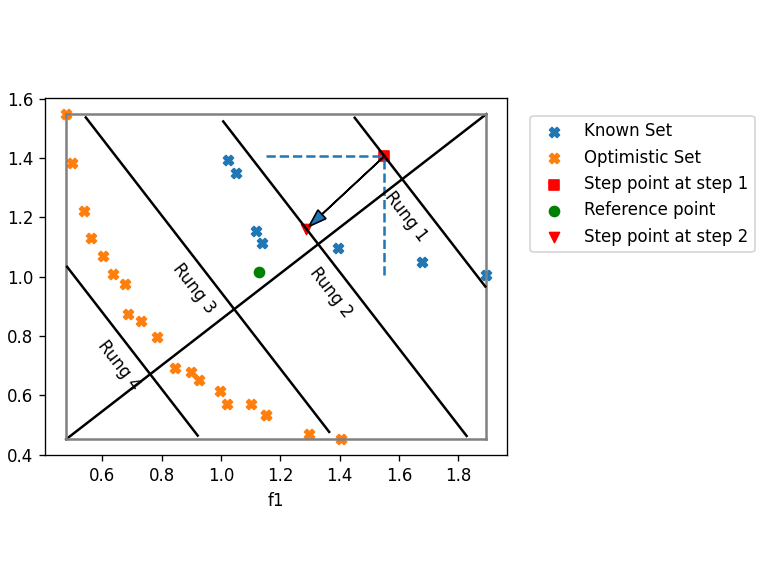

/home/rishi/.virtualenvs/O-NAUTILUS/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/rishi/.virtualenvs/O-NAUTILUS/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/rishi/.virtualenvs/O-NAUTILUS/lib/python3.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/rishi/.virtualenvs/O-NAUTILUS/lib/

In [128]:
fig, ax = plt.subplots()

# Known
ax.scatter(
    x=known_onaut["f1"],
    y=known_onaut["f2"],
    marker="X",
    color=(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
    label="Known Set")
# Optimistic
ax.scatter(
    x=opt_onaut["f1"],
    y=opt_onaut["f2"],
    marker="X",
    color=(1.0, 0.4980392156862745, 0.054901960784313725),
    label="Optimistic Set")
# Diagonal line
ax.plot(bounds["f1"], bounds["f2"], color="black")

# Same as above, but in seaborn
#sns.scatterplot(data=onaut, x="f1", y="f2", hue="Source",marker="X")
# diag
#sns.lineplot(data=bounds, x="f1", y="f2", color="black")

# Creating figure boundary
temp = bounds.copy()
temp["f2"][0] = bounds["f2"][1]
ax.plot(temp["f1"], temp["f2"], color="gray")

temp = bounds.copy()
temp["f2"][1] = bounds["f2"][0]
ax.plot(temp["f1"], temp["f2"], color="gray")

temp = bounds.copy()
temp["f1"][0] = bounds["f1"][1]
ax.plot(temp["f1"], temp["f2"], color="gray")

temp = bounds.copy()
temp["f1"][1] = bounds["f1"][0]
ax.plot(temp["f1"], temp["f2"], color="gray")

steps = 5
nadir = bounds[["f1", "f2"]].loc[1]
ideal = bounds[["f1", "f2"]].loc[0]
slope = (nadir - ideal)[1] / (nadir - ideal)[0]
slope = -1/slope
for i in range(steps+1):
    x = np.linspace(-1, 1, 101)
    y = slope * x
    rung = np.asarray((x,y)).T
    center = (i*ideal + (steps-i)*nadir)/steps
    rung = rung + center.values
    rung = rung[np.where(np.any(rung<ideal.values, axis=1)==False)[0],:]
    rung = rung[np.where(np.any(rung>nadir.values, axis=1)==False)[0],:]
    ax.plot(rung[:, 0], rung[:, 1], c="black")
    text_position = (rung[0] + rung[-1])/2 - 0.13
    angle = np.arctan(slope) * 180/np.pi
    if i!=0 and i!=steps:
        ax.text(*text_position, f"Rung {i}", rotation=angle)

    if i == 1:
        iteration_point = rung[5]
        ax.scatter(iteration_point[0], 
                    iteration_point[1], 
                    c="red", marker="s", 
                    label="Step point at step 1")
        ax.vlines(x=iteration_point[0],
                   ymax=iteration_point[1],
                   ymin=iteration_point[1]-0.4,
                   linestyle="dashed")
        ax.hlines(y=iteration_point[1],
                   xmax=iteration_point[0],
                   xmin=iteration_point[0]-0.4,
                   linestyle="dashed")
    if i == 2:
        new_point = rung[14]
        preference = new_point + (new_point - iteration_point) * 0.6
        ax.scatter(preference[0],
                    preference[1], 
                    c="green", marker="o", 
                    label="Reference point")
        ax.scatter(new_point[0],
                    new_point[1], 
                    c="red", marker="v", 
                    label="Step point at step 2")
        ax.arrow(iteration_point[0], 
                  iteration_point[1],
                  (new_point[0] - iteration_point[0])*0.8,
                  (new_point[1] - iteration_point[1])*0.8,
                  head_width=0.04)
        


plt.gca().set_aspect('equal', adjustable='box')
plt.legend(bbox_to_anchor=(1.05, 0.95), loc=2, borderaxespad=0.)
plt.tight_layout()

ax.set_xlabel("f1")
ax.set_ylabel("f2")

plt.savefig("step_refp.pdf", bbox_inches='tight')

In [101]:
np.arctan(slope) * 180/np.pi

-52.26502324431222

In [ ]:
x = np.linspace(-1, 1, 101)
y = slope * x
rung = np.asarray((x,y)).T
center = (i*ideal + (steps-i)*nadir)/steps
rung = rung + center.values


In [ ]:
rung = rung[np.where(np.any(rung<ideal.values, axis=1)==False),:]
rung = rung[np.where(np.any(rung>nadir.values, axis=1)==False),:]

In [ ]:
np.where(np.any(rung<ideal.values, axis=1)==False)[0]

In [ ]:
len(rung)

In [ ]:
np.random.choice(rung)

In [ ]:
np.random.choice([1])

In [ ]:
rung[np.random.choice(rung.shape[0])]

In [ ]:
iteration_point[1]

In [ ]:
iteration_point[1]-0.2